# COMP550 Final Project: 
## The Effectiveness of English Extractive Text Summarization Methods Across Languages

Nakiya Noorbhai, Kira Noël, and Luca Garnier-Landurie

## Datasets

We use the datasets cnn_dailymail (https://huggingface.co/datasets/cnn_dailymail) and mlsum (https://huggingface.co/datasets/mlsum) from huggingface. We will use the training split as our dev set and the validation and test sets as our test set.

In [59]:
from datasets import load_dataset, concatenate_datasets

# English
en_dev = load_dataset('cnn_dailymail', '3.0.0', split='train')
en_test = concatenate_datasets([load_dataset('cnn_dailymail', '3.0.0', split='validation'), load_dataset('cnn_dailymail', '3.0.0', split='test')])

# German
de_dev = load_dataset('mlsum', 'de', split='train')
de_test = concatenate_datasets([load_dataset('mlsum', 'de', split='validation'), load_dataset('mlsum', 'de', split='test')])

# Spanish
es_dev = load_dataset('mlsum', 'es', split='train')
es_test = concatenate_datasets([load_dataset('mlsum', 'es', split='validation'), load_dataset('mlsum', 'es', split='test')])

# French
fr_dev = load_dataset('mlsum', 'fr', split='train')
fr_test = concatenate_datasets([load_dataset('mlsum', 'fr', split='validation'), load_dataset('mlsum', 'fr', split='test')])

# Russian
ru_dev = load_dataset('mlsum', 'ru', split='train')
ru_test = concatenate_datasets([load_dataset('mlsum', 'ru', split='validation'), load_dataset('mlsum', 'ru', split='test')])

# Turkish
tu_dev = load_dataset('mlsum', 'tu', split='train')
tu_test = concatenate_datasets([load_dataset('mlsum', 'tu', split='validation'), load_dataset('mlsum', 'tu', split='test')])

Reusing dataset cnn_dailymail (/Users/Luca/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/Users/Luca/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/Users/Luca/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/Users/Luca/.cache/huggingface/datasets/mlsum/es/1.0.0/7

In [61]:
dev_sets = (en_dev, de_dev, es_dev, fr_dev, ru_dev, tu_dev)
test_sets = (en_test, de_test, es_test, fr_test, ru_test, tu_test)
languages = ('english', 'german', 'spanish', 'french', 'russian', 'turkish')

## Data Exploration

In [17]:
def print_stats(language, dev, test):
    '''
    Get the average summary and article lengths, and the average ratio.
    Also collect dataset sizes.
    '''
    SAMPLES = 5000

    summary_wcs_dev = []
    article_wcs_dev = []
    summary_scs_dev = []
    article_scs_dev = []
    summary_article_wc_ratios_dev = []
    count = 0
    for e in dev:
        if count >= SAMPLES:
            break
        count += 1
        try:
            article_wcs_dev.append(len(e['text'].split()))
            summary_wcs_dev.append(len(e['summary'].split()))
            article_scs_dev.append(len(e['text'].split('.')))
            summary_scs_dev.append(len(e['summary'].split('.')))
        except:
            article_wcs_dev.append(len(e['article'].split()))
            summary_wcs_dev.append(len(e['highlights'].split()))
            article_scs_dev.append(len(e['article'].split('.')))
            summary_scs_dev.append(len(e['highlights'].split('.')))
        summary_article_wc_ratios_dev.append(article_wcs_dev[-1] / summary_wcs_dev[-1])
    len_dev = len(summary_wcs_dev)
    avg_summary_wc_dev = sum(summary_wcs_dev) / len_dev
    avg_article_wc_dev = sum(article_wcs_dev) / len_dev
    avg_summary_sc_dev = sum(summary_scs_dev) / len_dev
    avg_article_sc_dev = sum(article_scs_dev) / len_dev
    avg_ratio_dev = sum(summary_article_wc_ratios_dev) / len_dev
    
    summary_wcs_test = []
    article_wcs_test = []
    summary_scs_test = []
    article_scs_test = []
    summary_article_wc_ratios_test = []
    count = 0
    for e in test:
        if count >= SAMPLES:
            break
        count += 1
        try:
            article_wcs_test.append(len(e['text'].split()))
            summary_wcs_test.append(len(e['summary'].split()))
            article_scs_test.append(len(e['text'].split('.')))
            summary_scs_test.append(len(e['summary'].split('.')))
        except:
            article_wcs_test.append(len(e['article'].split()))
            summary_wcs_test.append(len(e['highlights'].split()))
            article_scs_test.append(len(e['article'].split('.')))
            summary_scs_test.append(len(e['highlights'].split('.')))
        summary_article_wc_ratios_test.append(article_wcs_test[-1] / summary_wcs_test[-1])
    len_test = len(summary_wcs_test)
    avg_summary_wc_test = sum(summary_wcs_test) / len_test
    avg_article_wc_test = sum(article_wcs_test) / len_test
    avg_summary_sc_test = sum(summary_scs_test) / len_test
    avg_article_sc_test = sum(article_scs_test) / len_test
    avg_ratio_test = sum(summary_article_wc_ratios_test) / len_test

    print('--- ' + language + ' ---')
    print('Dev set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f, avg summary sc: %.2f, avg article sc: %.2f'
            %(len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, avg_summary_sc_dev, avg_article_sc_dev))
    print('Test set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f, avg summary sc: %.2f, avg article sc: %.2f'
            %(len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test, avg_summary_sc_test, avg_article_sc_test))
    print()
    return (language, len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, avg_summary_sc_dev, avg_article_sc_dev, 
            len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test, avg_summary_sc_test, avg_article_sc_test)

stats = []
for l, dev, test in zip(languages, dev_sets, test_sets):
    stats.append(print_stats(l, dev, test))

--- english ---
Dev set - num entries: 5000, avg summary wc: 45.60, avg article wc: 656.44, avg ratio: 14.65, avg summary sc: 4.85, avg article sc: 38.78
Test set - num entries: 5000, avg summary wc: 54.18, avg article wc: 670.72, avg ratio: 13.90, avg summary sc: 4.85, avg article sc: 35.96

--- german ---
Dev set - num entries: 5000, avg summary wc: 25.87, avg article wc: 516.23, avg ratio: 21.56, avg summary sc: 2.86, avg article sc: 32.29
Test set - num entries: 5000, avg summary wc: 23.11, avg article wc: 549.22, avg ratio: 25.17, avg summary sc: 2.86, avg article sc: 34.01

--- spanish ---
Dev set - num entries: 5000, avg summary wc: 17.33, avg article wc: 683.11, avg ratio: 41.98, avg summary sc: 1.13, avg article sc: 32.94
Test set - num entries: 5000, avg summary wc: 21.55, avg article wc: 741.88, avg ratio: 36.14, avg summary sc: 1.20, avg article sc: 34.23

--- french ---
Dev set - num entries: 5000, avg summary wc: 24.01, avg article wc: 494.56, avg ratio: 24.28, avg summar

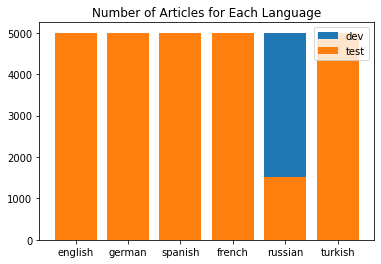

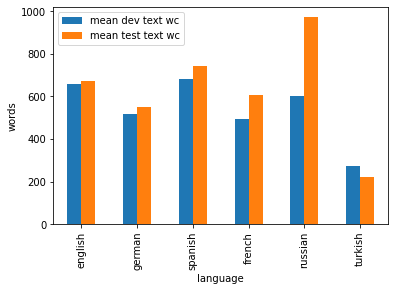

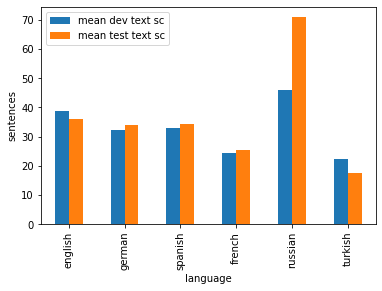

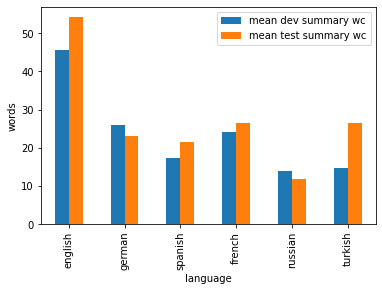

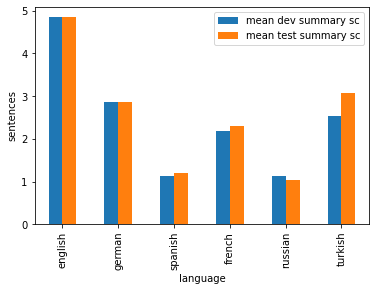

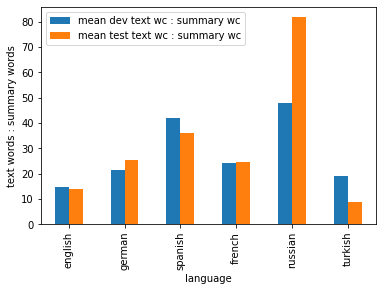

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

columns = ['language', 'number of dev articles', 'mean dev summary wc', 'mean dev text wc', 'mean dev text wc : summary wc', 'mean dev summary sc', 'mean dev text sc',
           'number of test articles', 'mean test summary wc', 'mean test text wc', 'mean test text wc : summary wc', 'mean test summary sc', 'mean test text sc']
df = pd.DataFrame(stats, columns=columns)

# Plot the relative sizes
len_dev = df['number of dev articles'].tolist()
len_test = df['number of test articles'].tolist()
plt.figure()
plt.title('Number of Articles for Each Language')
plt.bar(languages, len_dev, label='dev')
plt.bar(languages, len_test, label='test')
plt.legend(loc='upper right')
plt.show()

ax = df.plot(x='language', y=['mean dev text wc', 'mean test text wc'], kind='bar')
ax.set_ylabel('words')
plt.show()

ax = df.plot(x='language', y=['mean dev text sc', 'mean test text sc'], kind='bar')
ax.set_ylabel('sentences')
plt.show()

ax = df.plot(x='language', y=['mean dev summary wc', 'mean test summary wc'], kind='bar')
ax.set_ylabel('words')
plt.show()

ax = df.plot(x='language', y=['mean dev summary sc', 'mean test summary sc'], kind='bar')
ax.set_ylabel('sentences')
plt.show()

ax = df.plot(x='language', y=['mean dev text wc : summary wc', 'mean test text wc : summary wc'], kind='bar')
ax.set_ylabel('text words : summary words')
plt.show()

## Method

### Metrics

In [62]:
from rouge import Rouge
rouge = Rouge()

### Models

In [63]:
import numpy as np
from nltk.corpus import stopwords
from summarizers.luhn import luhn_summarize
from summarizers.textrank import textrank_summarize, w2v_textrank_summarize
from summarizers.lsa import lsa_summarize

In [64]:
def run_experiment(summarizer, dataset, language, name, save=None, max_samples=5000, stopwords=None, arg=None):
    """
    input:
        summarizer: model to summarize the text
        preprocess: preprocessing 
        dataset: data to summarize
        language: language name of dataset
        name: experiment name (ex. 'luhn_no_stopwords')
        save: if None, do not save. Otherwise, treat as dictionary and save results to save[name]
        max_samples: number of samples to summarize
        stopwords: stopwords to use with the summarizer
        arg: extra argument for summarizer
    """
    scores = []
    count = 0
    text = 'article' if language == 'english' else 'text'
    summary = 'highlights' if language == 'english' else 'summary'
    for e in dataset:
        hypothesis = summarizer(e[text], e[summary], stopwords, arg)
        reference = e[summary]
        if len(hypothesis) > 0:
            try:
                scores.append(rouge.get_scores(hypothesis, reference))
                count += 1
            except:
                1
        if count >= max_samples:
            break

    # Compute overall statistics
    r1_f1s = np.array([s[0]['rouge-1']['f'] for s in scores])
    r2_f1s = np.array([s[0]['rouge-2']['f'] for s in scores])

    stats = {
        'r1-f1': {'mean': np.mean(r1_f1s), 'std': np.std(r1_f1s)},
        'r2-f1': {'mean': np.mean(r2_f1s), 'std': np.std(r2_f1s)},
    }
    print(f'{name}: {stats}')

    if save is not None:
        save[name] = stats

In [65]:
### Randomly select sentences from the original text. Create a baseline. ###
import random 
from nltk.tokenize import sent_tokenize

random.seed(42)

def random_summarize(document, reference, arg1, arg2):
    sum_sentences = len(sent_tokenize(reference))
    sentences = sent_tokenize(document)
    if sum_sentences > len(sentences):
        return ''
    summary = ' '.join(random.sample(sentences, sum_sentences))
    return summary


## Experiment

In [66]:
english_rouge_scores = {}
french_rouge_scores = {}
german_rouge_scores = {}
russian_rouge_scores = {}
spanish_rouge_scores = {}
turkish_rouge_scores = {}

In [67]:
english_rouge_testscores = {}
french_rouge_testscores = {}
german_rouge_testscores = {}
russian_rouge_testscores = {}
spanish_rouge_testscores = {}
turkish_rouge_testscores = {}

### English

#### Luhn Summarizer

##### With Stopwords

In [68]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('english'), 
        arg=0.01*th,
        save=english_rouge_scores,
    )
#run_experiment(summarizer, dataset, language, name, save=None, max_samples=5000, stopwords=None, arg=None)
#run_experiment(random_summarize(document, reference, arg1, arg2), dev_sets[languages.index('english')],'english', 'baseline',save=english_rouge_scores,stopwords=None, arg=None)

luhn_sw_th_1%: {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565587148721477}, 'r2-f1

In [70]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('english')], 
        'english', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('english'), 
        arg=0.01*th,
        save=english_rouge_testscores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.30794531159112787, 'std': 0.12073661593517415}, 'r2-f1': {'mean': 0.11275602887583382, 'std': 0.09761987915984466}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.3077105201046729, 'std': 0.11855470434221684}, 'r2-f1': {'mean': 0.1112954255983666, 'std': 0.09659497490995109}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.3140228712099471, 'std': 0.11785003468716578}, 'r2-f1': {'mean': 0.11515268382652498, 'std': 0.09730027322135058}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.31905468450282354, 'std': 0.1179199639025664}, 'r2-f1': {'mean': 0.1185653927778191, 'std': 0.09725684644964237}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.3280685986379814, 'std': 0.12322701538701708}, 'r2-f1': {'mean': 0.12659220795346346, 'std': 0.10299542408004012}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.32717494685741116, 'std': 0.12245682448996362}, 'r2-f1': {'mean': 0.12702347809323247, 'std': 0.10481720147134191}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.30028476462895426, 'std': 0.12079999123956538}, 'r2-f1'

##### Without Stopwords

In [72]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=english_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.21746235165458466, 'std': 0.08978644747242888}, 'r2-f1': {'mean': 0.058863712543075715, 'std': 0.06607548722885678}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.21840444031146017, 'std': 0.08879718090895289}, 'r2-f1': {'mean': 0.05970509556536031, 'std': 0.06560132454792302}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2217944916285753, 'std': 0.08852350557863924}, 'r2-f1': {'mean': 0.06103890944638688, 'std': 0.06533468768638709}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.22825999006648504, 'std': 0.08918378293162026}, 'r2-f1': {'mean': 0.0643523785696358, 'std': 0.06654194951721842}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.23274943920351993, 'std': 0.09120634299678815}, 'r2-f1': {'mean': 0.06649202016777855, 'std': 0.06775543435983461}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.23403724219050792, 'std': 0.09128105129393249}, 'r2-f1': {'mean': 0.0678790535909055, 'std': 0.06815265279862215}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.23336456811094394, 'std': 0.092941440

In [74]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('english')], 
        'english', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=english_rouge_testscores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.263818209836583, 'std': 0.11058074731255677}, 'r2-f1': {'mean': 0.0842467127918752, 'std': 0.08547215417547323}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.26310763533008674, 'std': 0.10945476986429027}, 'r2-f1': {'mean': 0.08417313429057856, 'std': 0.08421789220477899}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2687610879916495, 'std': 0.1112178823809855}, 'r2-f1': {'mean': 0.08784214614635409, 'std': 0.0878150393928701}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.2785835375114418, 'std': 0.11386005168808276}, 'r2-f1': {'mean': 0.092896235049192, 'std': 0.08973848505195099}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.2895010019317846, 'std': 0.11668263918404573}, 'r2-f1': {'mean': 0.09995006762397061, 'std': 0.09344752246210472}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.29680824900749075, 'std': 0.1207534178091944}, 'r2-f1': {'mean': 0.1061658075009549, 'std': 0.09816057297175286}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.28704642660561824, 'std': 0.11640665348793613},

#### TextRank Summarizer (Unigram Overlap)

**With Stopwords**

In [78]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('english'), 
    arg=True,  # lower 
    save=english_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.24063952978773945, 'std': 0.08983469716578857}, 'r2-f1': {'mean': 0.07153641943589346, 'std': 0.06815386464408062}}


In [79]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('english'), 
    arg=True,  # lower 
    save=english_rouge_testscores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.3011024391029133, 'std': 0.11922455808162236}, 'r2-f1': {'mean': 0.1087866723641293, 'std': 0.09626333748447774}}


**Without Stopwords**

In [80]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=english_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.21858672860343004, 'std': 0.08736895376071378}, 'r2-f1': {'mean': 0.05851489656307806, 'std': 0.06434556061291041}}


In [81]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=english_rouge_testscores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.2669497069617294, 'std': 0.11388699442474118}, 'r2-f1': {'mean': 0.08678918727140081, 'std': 0.08854603084268634}}


#### TextRank Summarizer (Cosine Similarity)

**With Stopwords**

In [82]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('english'), 
    arg=True,
    save=english_rouge_scores,
)

textrank_sw_cos: {'r1-f1': {'mean': 0.19660366616086689, 'std': 0.09283313287021201}, 'r2-f1': {'mean': 0.04589284681659213, 'std': 0.06468773489106722}}


In [88]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('english'), 
    arg=True,
    save=english_rouge_testscores,
)

textrank_sw_cos: {'r1-f1': {'mean': 0.2399013293732315, 'std': 0.11283353198846671}, 'r2-f1': {'mean': 0.06738638276575527, 'std': 0.08157844895278123}}


**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_cos', 
    arg=True,
    save=english_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_cos', 
    arg=True,
    save=english_rouge_testscores,
)

### French

#### Luhn Summarizer

**With Stopwords**

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('french'), 
        arg=0.01*th,
        save=french_rouge_scores,
    )

In [ ]:
#Test Set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('french')], 
        'french', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('french'), 
        arg=0.01*th,
        save=french_rouge_testscores,
    )

**Without Stopwords**

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save=french_rouge_scores,
    )

In [ ]:
#Test Set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('french')], 
        'french', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save=french_rouge_testscores,
    )

<h4>TextRank Summarizer (Unigram Overlap) </h4>

**With Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('french'), 
    arg=True,  # lower 
    save=french_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('english'), 
    arg=True,  # lower 
    save=french_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=french_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=french_rouge_testscores,
)

<h4>TextRank Summarizer (Cosine Similarity) </h4>

**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('french'), 
    arg=True,
    save=french_rouge_scores,
)

In [ ]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('french'), 
    arg=True,
    save=french_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_cos', 
    arg=True,
    save=french_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_cos', 
    arg=True,
    save=french_rouge_testscores,
)

### German

#### Luhn Summarization

##### With Stopwords

In [116]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('german')], 
        'german', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('german'), 
        arg=0.01*th,
        save=german_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.37676047741488045, 'std': 0.3120093825559933}, 'r2-f1': {'mean': 0.29091299014648286, 'std': 0.3426518434931384}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.3426274097974054, 'std': 0.2922490441993183}, 'r2-f1': {'mean': 0.24856549165618702, 'std': 0.3211090120233873}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.35744304289973744, 'std': 0.2973216325043675}, 'r2-f1': {'mean': 0.26355980417978636, 'std': 0.32698520159751226}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.39672380956921205, 'std': 0.3100394635301716}, 'r2-f1': {'mean': 0.3057531641975319, 'std': 0.3421648483394817}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.3860935994094886, 'std': 0.31215508187874974}, 'r2-f1': {'mean': 0.2950857636989378, 'std': 0.3462963769033995}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.31787028228380215, 'std': 0.2775616258763955}, 'r2-f1': {'mean': 0.2203000781743082, 'std': 0.30486018358459877}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.17606882358358908, 'std': 0.1693838498938017}, 'r2-f1': {'mean'

In [117]:
##Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('german')], 
        'german', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('german'), 
        arg=0.01*th,
        save=german_rouge_testscores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.21296553817292638, 'std': 0.21515074369392978}, 'r2-f1': {'mean': 0.1097681379690967, 'std': 0.22568854021046772}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.20643137199338726, 'std': 0.19557189805930497}, 'r2-f1': {'mean': 0.0991198239895815, 'std': 0.20174251835359033}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.20846170345344972, 'std': 0.19405599886813651}, 'r2-f1': {'mean': 0.10059007109407728, 'std': 0.20021847927267739}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.22094209473627857, 'std': 0.20610163955079386}, 'r2-f1': {'mean': 0.11393249893827906, 'std': 0.21493618658809105}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.21665676511614848, 'std': 0.2114882782557706}, 'r2-f1': {'mean': 0.11113739995586315, 'std': 0.22200493806679047}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.1887697527306606, 'std': 0.1787453514183886}, 'r2-f1': {'mean': 0.08144974434635517, 'std': 0.1828695355192971}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.1431846422733942, 'std': 0.11747355772645092}, 'r2-f1':

##### Without Stopwords

In [123]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('german')], 
        'german', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=german_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.200667105637864, 'std': 0.20116780994924127}, 'r2-f1': {'mean': 0.09632424705849095, 'std': 0.21477065607602847}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.19874714643588803, 'std': 0.19609312165798598}, 'r2-f1': {'mean': 0.08914294782568923, 'std': 0.20924526201177562}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2046991427887078, 'std': 0.1973096463246759}, 'r2-f1': {'mean': 0.091540331243296, 'std': 0.2114661207762619}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.22038400763430227, 'std': 0.21428992520230045}, 'r2-f1': {'mean': 0.10780689553210546, 'std': 0.23154487353756564}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.2697044370237269, 'std': 0.25548365277995694}, 'r2-f1': {'mean': 0.16224187028253592, 'std': 0.2792094696910808}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.3111748118429063, 'std': 0.2859299234152423}, 'r2-f1': {'mean': 0.2128738355176174, 'std': 0.31513402564903326}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.17790057313546842, 'std': 0.17136711850521505},

In [124]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('german')], 
        'german', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=german_rouge_testscores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.15728671744097197, 'std': 0.15465865787979108}, 'r2-f1': {'mean': 0.05271044245881298, 'std': 0.15514498288898232}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.1514039873038219, 'std': 0.13077087972251525}, 'r2-f1': {'mean': 0.043624399602398875, 'std': 0.12663635357404945}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.15380132921291298, 'std': 0.1296092110600919}, 'r2-f1': {'mean': 0.04296324182880471, 'std': 0.12480643717614348}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.16155036009265167, 'std': 0.14148592236558377}, 'r2-f1': {'mean': 0.050497051268390096, 'std': 0.13984035232217887}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.1752733173079838, 'std': 0.16079102469388024}, 'r2-f1': {'mean': 0.06503797877095938, 'std': 0.1628110594546252}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.1815738887408062, 'std': 0.16906363304978225}, 'r2-f1': {'mean': 0.07297639419870729, 'std': 0.17212422117271284}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.14453543587483683, 'std': 0.1176015166

#### TextRank Summarizer (Unigram Overlap)

**With Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('german'), 
    arg=True,  # lower 
    save=german_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('german'), 
    arg=True,  # lower 
    save=german_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=german_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=german_rouge_testscores,
)

#### TextRank Summarizer (Cosine Similarity)

**With Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('german'), 
    arg=True,
    save=german_rouge_scores,
)

In [ ]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('german'), 
    arg=True,
    save=german_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_cos', 
    arg=True,
    save=german_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_cos', 
    arg=True,
    save=german_rouge_testscores,
)

### Russian

#### Luhn Summarizer
##### With Stopwords

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('russian')], 
        'russian', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('russian'), 
        arg=0.01*th,
        save=russian_rouge_scores,
    )

In [ ]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('russian')], 
        'russian', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('russian'), 
        arg=0.01*th,
        save=russian_rouge_testscores,
    )

##### Without Stopwords

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('russian')], 
        'russian', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=russian_rouge_scores,
    )

In [ ]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('russian')], 
        'russian', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=russian_rouge_testscores,
    )

#### TextRank Summarizer (Unigram Overlap)
**With Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('russian'), 
    arg=True,  # lower 
    save=russian_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('russian'), 
    arg=True,  # lower 
    save=russian_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=russian_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=russian_rouge_testscores,
)

#### TextRank Summarizer (Cosine Similarity)
**With Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('russian'), 
    arg=True,
    save=russian_rouge_scores,
)

In [ ]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('russian'), 
    arg=True,
    save=russian_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_cos', 
    arg=True,
    save=russian_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_cos', 
    arg=True,
    save=russian_rouge_testscores,
)

### Spanish

#### Luhn Summarizer
##### With Stopwords

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('spanish'), 
        arg=0.01*th,
        save=spanish_rouge_scores,
    )

In [ ]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('spanish'), 
        arg=0.01*th,
        save=spanish_rouge_testscores,
    )

##### Without Stopwords

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=spanish_rouge_scores,
    )

In [ ]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=spanish_rouge_testscores,
    )

#### TextRank Summarizer (Unigram Overlap)
**With Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('spanish'), 
    arg=True,  # lower 
    save=spanish_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('spanish'), 
    arg=True,  # lower 
    save=spanish_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=spanish_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=spanish_rouge_testscores,
)

#### TextRank Summarizer (Cosine Similarity)
**With Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('spanish'), 
    arg=True,
    save=spanish_rouge_scores,
)

In [ ]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('spanish'), 
    arg=True,
    save=spanish_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_cos', 
    arg=True,
    save=spanish_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_cos', 
    arg=True,
    save=spanish_rouge_testscores,
)

### Turkish

#### Luhn Summarizer
##### With Stopwords

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('turkish'), 
        arg=0.01*th,
        save=turkish_rouge_scores,
    )

In [ ]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('turkish'), 
        arg=0.01*th,
        save=turkish_rouge_testscores,
    )

##### Without Stopwords

In [ ]:
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=turkish_rouge_scores,
    )

In [ ]:
#Test set
for th in [2**n for n in range(7)] + [100]:
    name = f'top {th}% of words considered meaningful'
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save=turkish_rouge_testscores,
    )

#### TextRank Summarizer (Unigram Overlap)
**With Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('turkish'), 
    arg=True,  # lower 
    save=turkish_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('turkish'), 
    arg=True,  # lower 
    save=turkish_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=turkish_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_uni', 
    arg=True,  # lower 
    save=turkish_rouge_testscores,
)

#### TextRank Summarizer (Cosine Similarity)
**With Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('turkish'), 
    arg=True,
    save=turkish_rouge_scores,
)

In [ ]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('turkish'), 
    arg=True,
    save=turkish_rouge_testscores,
)

**Without Stopwords**

In [ ]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_cos', 
    arg=True,
    save=turkish_rouge_scores,
)

In [ ]:
#Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_cos', 
    arg=True,
    save=turkish_rouge_testscores,
)

## Analysis (aka plots)

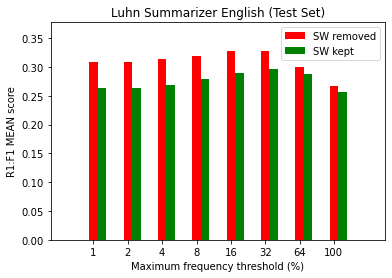

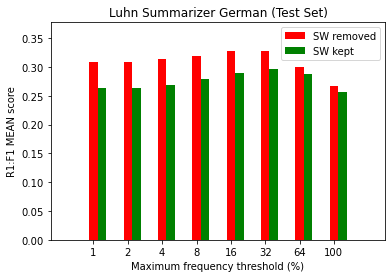

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

ind = np.arange(8)
width = 0.25
tick_values = [0,1,2,3,4,5,6,7]
labellist = ['1','2','4','8','16','32','64','100']


#"Luhn Summarizer English - R1:F1 mean score"

noSW_rouge_eng_test = [0.263818209836583, 0.26310763533008674, 0.2687610879916495, 0.2785835375114418, 0.2895010019317846, 0.29680824900749075, 0.28704642660561824, 0.25595213448594134]
SW_rouge_eng_test = [0.30794531159112787, 0.3077105201046729, 0.3140228712099471, 0.31905468450282354, 0.3280685986379814, 0.32717494685741116, 0.30028476462895426, 0.2667052928972177]

plt.figure()
plt.title('Luhn Summarizer English (Test Set)')
plt.xlabel('Maximum frequency threshold (%)')
plt.ylabel('R1:F1 MEAN score')

plt.xticks(ticks = tick_values ,labels = labellist, rotation = 'horizontal')
bar1=plt.bar(ind, SW_rouge_eng_test, width=0.25, color='r')
bar2=plt.bar(ind+width, noSW_rouge_eng_test, width=0.25, color='g')

plt.legend( (bar1,bar2), ('SW removed', 'SW kept'), loc='best')
plt.margins(0.15)
plt.show()

#"Luhn Summarizer German - R1:F1 mean score"

noSW_rouge_german_test = [0.15728671744097197,0.1514039873038219, 0.15380132921291298, 0.16155036009265167, 0.1752733173079838, 0.1815738887408062, 0.14453543587483683, 0.12815340587960342]
SW_rouge_german_test = [0.21296553817292638, 0.20643137199338726, 0.20846170345344972, 0.22094209473627857, 0.21665676511614848, 0.1887697527306606, 0.1431846422733942, 0.127944416198867]

plt.figure()
plt.title('Luhn Summarizer German (Test Set)')
plt.xlabel('Maximum frequency threshold (%)')
plt.ylabel('R1:F1 MEAN score')

plt.xticks(ticks = tick_values ,labels = labellist, rotation = 'horizontal')
bar3=plt.bar(ind, SW_rouge_eng_test, width=0.25, color='r')
bar4=plt.bar(ind+width, noSW_rouge_eng_test, width=0.25, color='g')

plt.legend( (bar1,bar2), ('SW removed', 'SW kept'), loc='best')
plt.margins(0.15)
plt.show()


#